In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Open the  memory file for reading
loaded_data = pd.read_csv('/content/drive/My Drive/UChicago_Project/RL/playing_memory_880.csv')
loaded_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action,reward,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity,q_values
0,0,0.013870,0.026208,0.027376,0.033123,1,1.0,0.014394,0.220927,0.028038,-0.250798,"[17.424397, 18.431095]"
1,0,0.014394,0.220927,0.028038,-0.250798,1,1.0,0.018813,0.415638,0.023022,-0.534507,"[17.785023, 18.40013]"
2,0,0.018813,0.415638,0.023022,-0.534507,0,1.0,0.027126,0.220200,0.012332,-0.234660,"[18.670609, 18.5435]"
3,0,0.027126,0.220200,0.012332,-0.234660,1,1.0,0.031530,0.415143,0.007639,-0.523427,"[17.776121, 18.367172]"
4,0,0.031530,0.415143,0.007639,-0.523427,0,1.0,0.039833,0.219915,-0.002830,-0.228347,"[18.685854, 18.484688]"
...,...,...,...,...,...,...,...,...,...,...,...,...
281026,879,-2.213496,-2.209000,-0.093698,1.570399,1,1.0,-2.257676,-2.012893,-0.062290,1.250021,"[15.553661, 16.088898]"
281027,879,-2.257676,-2.012893,-0.062290,1.250021,0,1.0,-2.297934,-2.207164,-0.037290,1.522561,"[15.931983, 15.726796]"
281028,879,-2.297934,-2.207164,-0.037290,1.522561,1,1.0,-2.342077,-2.011611,-0.006839,1.218476,"[15.423721, 16.090506]"
281029,879,-2.342077,-2.011611,-0.006839,1.218476,0,1.0,-2.382310,-2.206644,0.017531,1.509008,"[15.83497, 15.593561]"


In [2]:
loaded_data.shape

(281031, 12)

In [3]:
loaded_data.dtypes

episode                        int64
cart_position                float64
cart_velocity                float64
pole_angle                   float64
pole_angular_velocity        float64
action                         int64
reward                       float64
new_cart_position            float64
new_cart_velocity            float64
new_pole_angle               float64
new_pole_angular_velocity    float64
q_values                      object
dtype: object

In [4]:
loaded_data['action'].value_counts(dropna = False)

0    143900
1    137131
Name: action, dtype: int64

In [5]:
#max of episode length
loaded_data['episode'].value_counts()

404    362
248    362
66     360
28     359
271    359
      ... 
214    286
94     285
737    285
840    284
9      284
Name: episode, Length: 880, dtype: int64

# Data Preproceessing: state, action, q-value

In [2]:
#extract the number of q_value
import re

def extract_numeric_range(text):
    values = re.findall(r'\d+\.\d+', text)
    values = [float(value) for value in values]
    return values

# Apply the function to the column
loaded_data['q_values'] = loaded_data['q_values'].apply(extract_numeric_range)

In [3]:
#choose max q_values
loaded_data['max_qvalue'] = loaded_data['q_values'].apply(lambda x: max(x))
loaded_data

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action,reward,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity,q_values,max_qvalue
0,0,0.013870,0.026208,0.027376,0.033123,1,1.0,0.014394,0.220927,0.028038,-0.250798,"[17.424397, 18.431095]",18.431095
1,0,0.014394,0.220927,0.028038,-0.250798,1,1.0,0.018813,0.415638,0.023022,-0.534507,"[17.785023, 18.40013]",18.400130
2,0,0.018813,0.415638,0.023022,-0.534507,0,1.0,0.027126,0.220200,0.012332,-0.234660,"[18.670609, 18.5435]",18.670609
3,0,0.027126,0.220200,0.012332,-0.234660,1,1.0,0.031530,0.415143,0.007639,-0.523427,"[17.776121, 18.367172]",18.367172
4,0,0.031530,0.415143,0.007639,-0.523427,0,1.0,0.039833,0.219915,-0.002830,-0.228347,"[18.685854, 18.484688]",18.685854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281026,879,-2.213496,-2.209000,-0.093698,1.570399,1,1.0,-2.257676,-2.012893,-0.062290,1.250021,"[15.553661, 16.088898]",16.088898
281027,879,-2.257676,-2.012893,-0.062290,1.250021,0,1.0,-2.297934,-2.207164,-0.037290,1.522561,"[15.931983, 15.726796]",15.931983
281028,879,-2.297934,-2.207164,-0.037290,1.522561,1,1.0,-2.342077,-2.011611,-0.006839,1.218476,"[15.423721, 16.090506]",16.090506
281029,879,-2.342077,-2.011611,-0.006839,1.218476,0,1.0,-2.382310,-2.206644,0.017531,1.509008,"[15.83497, 15.593561]",15.834970


# Clustering

In [4]:
inf = float("inf")
thre_dic = {'cart_position': {0: (-inf, -2.3999386),
  1: (-2.3999386, -1.9460012),
  2: (-1.9460012, -1.6043862),
  3: (-1.6043862, -0.8419018),
  4: (-0.8419018, -0.7204568),
  5: (-0.7204568, inf)},
 'cart_velocity': {0: (-inf, -1.4636338),
  1: (-1.4636338, -1.1430725),
  2: (-1.1430725, -0.7526472),
  3: (-0.7526472, -0.7046855),
  4: (-0.7046855, -0.22839466),
  5: (-0.22839466, inf)},
 'pole_angle': {0: (-inf, -0.20146218),
  1: (-0.20146218, -0.15661636),
  2: (-0.15661636, -0.11674419),
  3: (-0.11674419, -0.10212591),
  4: (-0.10212591, -0.09485163),
  5: (-0.09485163, inf)},
 'pole_angular_velocity': {0: (-inf, -0.8471889),
  1: (-0.8471889, -0.6143664),
  2: (-0.6143664, -0.18185113),
  3: (-0.18185113, 0.13288449),
  4: (0.13288449, 0.15042588),
  5: (0.15042588, inf)}}

In [5]:
col = ['cart_position', 'cart_velocity', 'pole_angle', 'pole_angular_velocity']
data = loaded_data[['episode','cart_position','cart_velocity','pole_angle',
                   'pole_angular_velocity','action','max_qvalue']]
optimal_num_clusters = 6
for c in col:
    var_thre = thre_dic[c]
    ls = []
    for d in list(data[c]):
        for i in range(optimal_num_clusters):
            var_clus_thre = var_thre[i]
            if d <= var_clus_thre[1] and d > var_clus_thre[0]:
                ls.append(i)
    data[c] = ls

<ipython-input-5-930a8ed891af>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = ls


In [6]:
data

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action,max_qvalue
0,0,5,5,5,3,1,18.431095
1,0,5,5,5,2,1,18.400130
2,0,5,5,5,2,0,18.670609
3,0,5,5,5,2,1,18.367172
4,0,5,5,5,2,0,18.685854
...,...,...,...,...,...,...,...
281026,879,1,0,5,5,1,16.088898
281027,879,1,0,5,5,0,15.931983
281028,879,1,0,5,5,1,16.090506
281029,879,1,0,5,5,0,15.834970


# Processing

In [6]:
#one-hot encoding action column
data = pd.get_dummies(data,columns = ['action'])
data.head()

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,max_qvalue,action_0,action_1
0,0,5,5,5,3,18.431095,0,1
1,0,5,5,5,2,18.400130,0,1
2,0,5,5,5,2,18.670609,1,0
3,0,5,5,5,2,18.367172,0,1
4,0,5,5,5,2,18.685854,1,0


## Save it to folder

In [51]:
data.to_csv('/content/drive/My Drive/UChicago_Project/RL/bucket_data.csv', index=False)

## Get the first 100 data from each episode

In [21]:
grouped = data.groupby('episode')

# Create an empty DataFrame to store the result
result_df = pd.DataFrame()

# Iterate over each group and select the first 100 rows from each group
for episode, group_data in grouped:
    first_100_rows = group_data.head(100)
    result_df = result_df.append(first_100_rows)

# Reset the index of the resulting DataFrame
result_df.reset_index(drop=True, inplace=True)
result_df

<ipython-input-21-e8227b5b5c1d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(first_100_rows)
<ipython-input-21-e8227b5b5c1d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(first_100_rows)
<ipython-input-21-e8227b5b5c1d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(first_100_rows)
<ipython-input-21-e8227b5b5c1d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(first_100_rows)
<ipython-input-21-e8227b5b5c1d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,max_qvalue,action_0,action_1
0,0,5,5,5,3,18.431095,0,1
1,0,5,5,5,2,18.400130,0,1
2,0,5,5,5,2,18.670609,1,0
3,0,5,5,5,2,18.367172,0,1
4,0,5,5,5,2,18.685854,1,0
...,...,...,...,...,...,...,...,...
87995,879,5,5,5,3,18.566952,0,1
87996,879,5,5,5,2,18.562965,1,0
87997,879,5,5,5,3,18.649141,0,1
87998,879,5,5,5,2,18.569508,1,0


In [7]:
from keras.preprocessing.sequence import pad_sequences
# Group DataFrame by episodes
grouped_count = data.groupby('episode').count().iloc[:,0]

# Define a list of sequence lengths for each sample
sequence_lengths = list(grouped_count)  # Replace with your actual sequence lengths

# Calculate the number of samples
num_samples = len(sequence_lengths)

# Reshape the data to (num_samples, sequence_length, feature)
reshaped_data = np.empty((num_samples, max(sequence_lengths), data.shape[1]))

# Fill in the reshaped data
start_idx = 0
for i, seq_length in enumerate(sequence_lengths):
    start = max(sequence_lengths) - seq_length
    end_idx = start_idx + seq_length
    reshaped_data[i, start:, :] = data.iloc[start_idx:end_idx, :]
    start_idx = end_idx
reshaped_data.shape

(880, 362, 8)

## Train test split (for all steps)

In [8]:
train_size = int(len(reshaped_data) * 0.8)
train= reshaped_data[:train_size, :, :]
test = reshaped_data[train_size:, :, :]

y_train = train[:,:,5].reshape(len(train), max(sequence_lengths), 1)
y_test = test[:,:,5].reshape(len(test), max(sequence_lengths), 1)

X_train = np.delete(train, [0, 5], axis=2)
X_test = np.delete(test, [0, 5], axis=2)

max_len = max(sequence_lengths)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(704, 362, 6)
(176, 362, 6)
(704, 362, 1)


## Train test split (for 100 steps only)

In [22]:
#train, test split
train_size = int(len(result_df) * 0.8)
test_size = len(result_df) - train_size
train, test = result_df.iloc[:train_size,:], result_df.iloc[train_size:len(result_df),:]

#x,y split
X_train = train.drop(['episode','max_qvalue'], axis=1)
y_train = train['max_qvalue']

X_test = test.drop(['episode','max_qvalue'], axis=1)
y_test = test['max_qvalue']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70400, 6)
(17600, 6)
(70400,)
(17600,)


In [24]:
X_train.head()

,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action_0,action_1
0,5,5,5,3,0,1
1,5,5,5,2,0,1
2,5,5,5,2,1,0
3,5,5,5,2,0,1
4,5,5,5,2,1,0


In [25]:
#change to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(X_train[:10])
print(y_train[:10])

print(X_test[:10])
print(y_test[:10])

[[5 5 5 3 0 1]
 [5 5 5 2 0 1]
 [5 5 5 2 1 0]
 [5 5 5 2 0 1]
 [5 5 5 2 1 0]
 [5 5 5 2 0 1]
 [5 5 5 2 1 0]
 [5 5 5 2 0 1]
 [5 5 5 2 1 0]
 [5 5 5 2 0 1]]
[18.431095 18.40013  18.670609 18.367172 18.685854 18.362505 18.759968
 18.445015 18.77426  18.499737]
[[5 5 5 3 0 1]
 [5 5 5 2 0 1]
 [5 5 5 2 1 0]
 [5 5 5 2 0 1]
 [5 5 5 2 1 0]
 [5 5 5 2 0 1]
 [5 5 5 2 1 0]
 [5 5 5 2 0 1]
 [5 5 5 2 1 0]
 [5 5 5 2 1 0]]
[18.49539  18.7057   19.053587 18.668556 19.143974 18.65077  19.198977
 18.67047  19.226694 18.854366]


In [26]:
#length of each episode
max_len = 100

#how many episode
episode=880
train_len = int(episode*0.8)
test_len = int(episode *0.2)

In [27]:
#reshape the data to lstm input data
X_train = X_train.reshape(train_len, max_len, 6)
X_test = X_test.reshape(test_len, max_len, 6)

y_train = y_train.reshape(train_len, max_len, 1)
y_test = y_test.reshape(test_len, max_len, 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[:10])
print(y_test[:10])

(704, 100, 6)
(176, 100, 6)
(704, 100, 1)
(176, 100, 1)
[[[5 5 5 3 0 1]
  [5 5 5 2 0 1]
  [5 5 5 2 1 0]
  ...
  [5 4 5 5 0 1]
  [5 4 5 5 0 1]
  [5 5 5 3 0 1]]

 [[5 5 5 3 0 1]
  [5 5 5 2 0 1]
  [5 5 5 2 1 0]
  ...
  [5 5 5 2 1 0]
  [5 5 5 2 0 1]
  [5 5 5 2 1 0]]

 [[5 5 5 3 0 1]
  [5 5 5 2 1 0]
  [5 5 5 3 1 0]
  ...
  [5 5 5 2 1 0]
  [5 5 5 2 0 1]
  [5 5 5 2 1 0]]

 ...

 [[5 5 5 3 0 1]
  [5 5 5 2 1 0]
  [5 5 5 3 0 1]
  ...
  [5 5 5 3 0 1]
  [5 5 5 2 1 0]
  [5 5 5 3 0 1]]

 [[5 5 5 3 0 1]
  [5 5 5 2 0 1]
  [5 5 5 2 1 0]
  ...
  [5 5 5 2 1 0]
  [5 5 5 2 0 1]
  [5 5 5 2 1 0]]

 [[5 5 5 3 0 1]
  [5 5 5 2 1 0]
  [5 5 5 3 0 1]
  ...
  [5 5 5 3 0 1]
  [5 5 5 2 1 0]
  [5 5 5 3 0 1]]]
[[[18.49539 ]
  [18.7057  ]
  [19.053587]
  [18.668556]
  [19.143974]
  [18.65077 ]
  [19.198977]
  [18.67047 ]
  [19.226694]
  [18.854366]
  [18.71721 ]
  [18.992569]
  [18.769548]
  [19.081707]
  [18.875486]
  [18.871683]
  [18.883598]
  [18.831985]
  [18.88186 ]
  [18.686504]
  [18.856533]
  [18.52801 ]
  [18.

# Modeling


LSTM

In [10]:
import keras

from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.regularizers import l1, l2


In [35]:
# Train the model with mini-batches
batch_size = 100
epochs = 30

In [43]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(62, input_shape=(max_len, 6), kernel_initializer=GlorotUniform()))
model.add(Dense(62, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(31, activation='relu'))

model.add(Dense(1))  # Output layer for Q-value prediction

# Compile the model
optimizer = keras.optimizers.Adam(lr=0.005)
#optimizer = keras.optimizers.SGD(clipvalue=1)

model.compile(optimizer = optimizer, loss='mean_squared_error')

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 62)                17112     
                                                                 
 dense_13 (Dense)            (None, 62)                3906      
                                                                 
 dense_14 (Dense)            (None, 31)                1953      
                                                                 
 dense_15 (Dense)            (None, 1)                 32        
                                                                 
Total params: 23003 (89.86 KB)
Trainable params: 23003 (89.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
    shuffle=False, validation_data=(X_test, y_test))

Epoch 1/30
8/8 [==============================] - 5s 218ms/step - loss: 321.4785 - val_loss: 291.0839
Epoch 2/30
8/8 [==============================] - 1s 106ms/step - loss: 269.0974 - val_loss: 228.6539
Epoch 3/30
8/8 [==============================] - 1s 107ms/step - loss: 198.0190 - val_loss: 143.7415
Epoch 4/30
8/8 [==============================] - 1s 109ms/step - loss: 108.1104 - val_loss: 52.0120
Epoch 5/30
8/8 [==============================] - 1s 107ms/step - loss: 26.5512 - val_loss: 0.9349
Epoch 6/30
8/8 [==============================] - 1s 108ms/step - loss: 2.4631 - val_loss: 8.4620
Epoch 7/30
8/8 [==============================] - 1s 108ms/step - loss: 7.0308 - val_loss: 2.2231
Epoch 8/30
8/8 [==============================] - 1s 105ms/step - loss: 0.7144 - val_loss: 0.3161
Epoch 9/30
8/8 [==============================] - 1s 107ms/step - loss: 0.7197 - val_loss: 0.8695
Epoch 10/30
8/8 [==============================] - 1s 115ms/step - loss: 0.5632 - val_loss: 0.1069
Epo

In [45]:
## Plotting results
def plot_train_loss(history):

    # Plot loss during training
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Plotting results
def plot_val_loss(history):

    # Plot loss during training
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

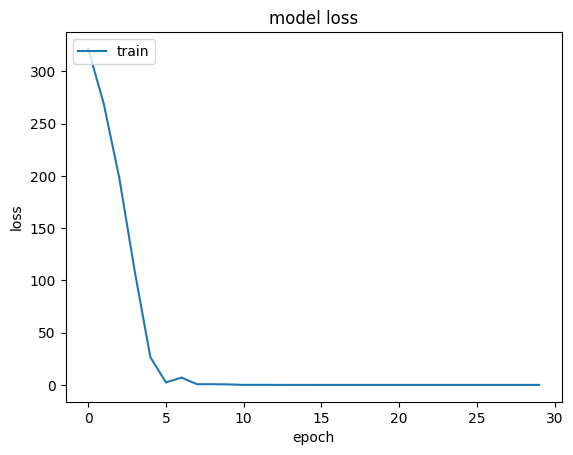

In [46]:
plot_train_loss(history)

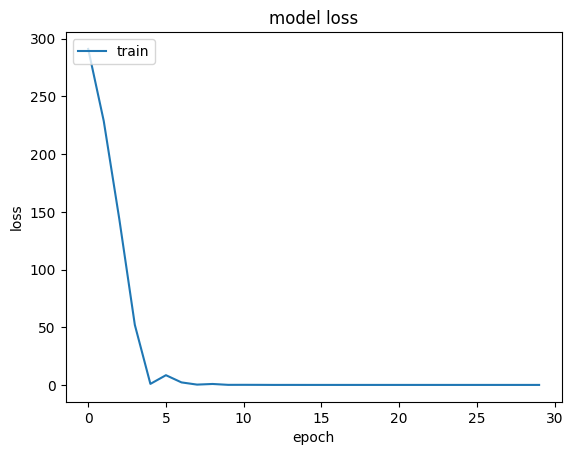

In [47]:
plot_val_loss(history)

In [48]:
model.save('/content/drive/My Drive/UChicago_Project/RL/lstm.h5')

GRU

In [29]:
# Train the model with mini-batches
batch_size_1 = 100
epochs_1 = 30

In [30]:
# Create the LSTM model
model_1 = Sequential()
model_1.add(LSTM(30, input_shape=(max_len, 6)))
model_1.add(Dense(32))

model_1.add(Dense(1))  # Output layer for Q-value prediction

# Compile the model
model_1.compile(optimizer='adam', loss='mean_squared_error')

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30)                4440      
                                                                 
 dense_5 (Dense)             (None, 32)                992       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5465 (21.35 KB)
Trainable params: 5465 (21.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
history_1 = model_1.fit(X_train, y_train, batch_size=batch_size_1, epochs=epochs_1,
    shuffle=False, validation_data=(X_test, y_test))

Epoch 1/30
8/8 [==============================] - 8s 226ms/step - loss: 340.1004 - val_loss: 307.0431
Epoch 2/30
8/8 [==============================] - 1s 90ms/step - loss: 289.2262 - val_loss: 261.6158
Epoch 3/30
8/8 [==============================] - 1s 66ms/step - loss: 245.0333 - val_loss: 217.9334
Epoch 4/30
8/8 [==============================] - 0s 48ms/step - loss: 201.5031 - val_loss: 173.6963
Epoch 5/30
8/8 [==============================] - 0s 53ms/step - loss: 155.9710 - val_loss: 125.8114
Epoch 6/30
8/8 [==============================] - 0s 55ms/step - loss: 107.4149 - val_loss: 77.8718
Epoch 7/30
8/8 [==============================] - 0s 52ms/step - loss: 61.9032 - val_loss: 38.2546
Epoch 8/30
8/8 [==============================] - 0s 51ms/step - loss: 27.3283 - val_loss: 12.8020
Epoch 9/30
8/8 [==============================] - 0s 52ms/step - loss: 7.5460 - val_loss: 1.7920
Epoch 10/30
8/8 [==============================] - 0s 51ms/step - loss: 0.6712 - val_loss: 0.0799
E

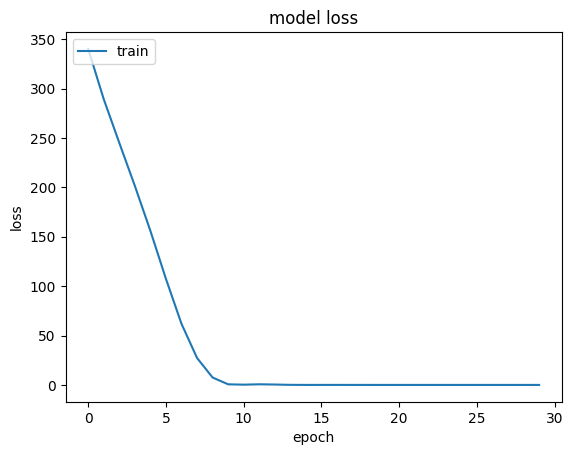

In [33]:
plot_train_loss(history_1)

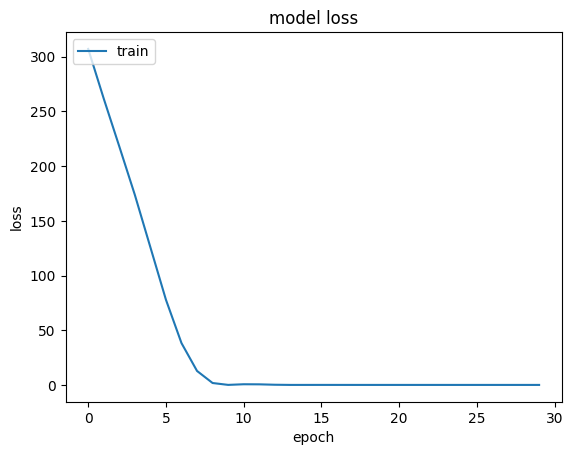

In [34]:
plot_val_loss(history_1)